In [1]:
!pip install tensorflow matplotlib

In [2]:
!pip install --upgrade numpy h5py

Requirement already up-to-date: numpy in c:\users\win-10\anaconda3\lib\site-packages (1.24.4)
Requirement already up-to-date: h5py in c:\users\win-10\anaconda3\lib\site-packages (3.11.0)


In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

In [4]:
train_dir = r"C:\Users\win-10\Desktop\bone\train"
valid_dir = r"C:\Users\win-10\Desktop\bone\valid"


In [5]:
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode="binary"
)

valid_data = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode="binary"
)


Found 1418 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [6]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation="relu", input_shape=(128,128,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(128, (3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])


In [7]:
model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [8]:
history = model.fit(
    train_data,
    epochs=5,
    validation_data=valid_data
)

Epoch 1/5
45/45 [==============================] - 24s 502ms/step - loss: 0.2137 - accuracy: 0.8970 - val_loss: 0.1800 - val_accuracy: 0.9200
Epoch 2/5
45/45 [==============================] - 22s 496ms/step - loss: 0.0441 - accuracy: 0.9824 - val_loss: 0.1052 - val_accuracy: 0.9600
Epoch 3/5
45/45 [==============================] - 22s 487ms/step - loss: 0.0310 - accuracy: 0.9880 - val_loss: 0.0134 - val_accuracy: 1.0000
Epoch 4/5
45/45 [==============================] - 21s 475ms/step - loss: 0.0506 - accuracy: 0.9774 - val_loss: 0.0458 - val_accuracy: 0.9800
Epoch 5/5
45/45 [==============================] - 22s 485ms/step - loss: 0.0157 - accuracy: 0.9972 - val_loss: 0.0138 - val_accuracy: 1.0000


In [10]:
import matplotlib.pyplot as plt

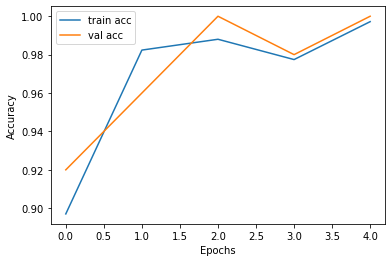

In [11]:
plt.plot(history.history["accuracy"], label="train acc")
plt.plot(history.history["val_accuracy"], label="val acc")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [12]:
model.save("bone_classifier.h5")


In [22]:
import numpy as np
from tensorflow.keras.preprocessing import image

img = image.load_img(r"C:\Users\win-10\Desktop\bone\valid\Healthy\IMG_8032_JPG.rf.ebd0a4b25f5cdbe9d312794af4907807.jpg", target_size=(128,128))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)

if prediction[0][0] > 0.5:
    print("Prediction: Cancer")
else:
    print("Prediction: Healthy")


1/1 [==============================] - 0s 221ms/step
Prediction: Healthy
